<a href="https://colab.research.google.com/github/anirudh9784/Total-bike-being-rented-prediction/blob/master/Bike%20Rental.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [0]:
files.upload()

In [0]:
df=pd.read_csv('bike-sharing-hour.csv',index_col=0)

In [87]:
df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [0]:
df.drop('dteday',axis=1,inplace=True)

In [89]:
df.head()


,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2811c8f208>,
      dtype=object)

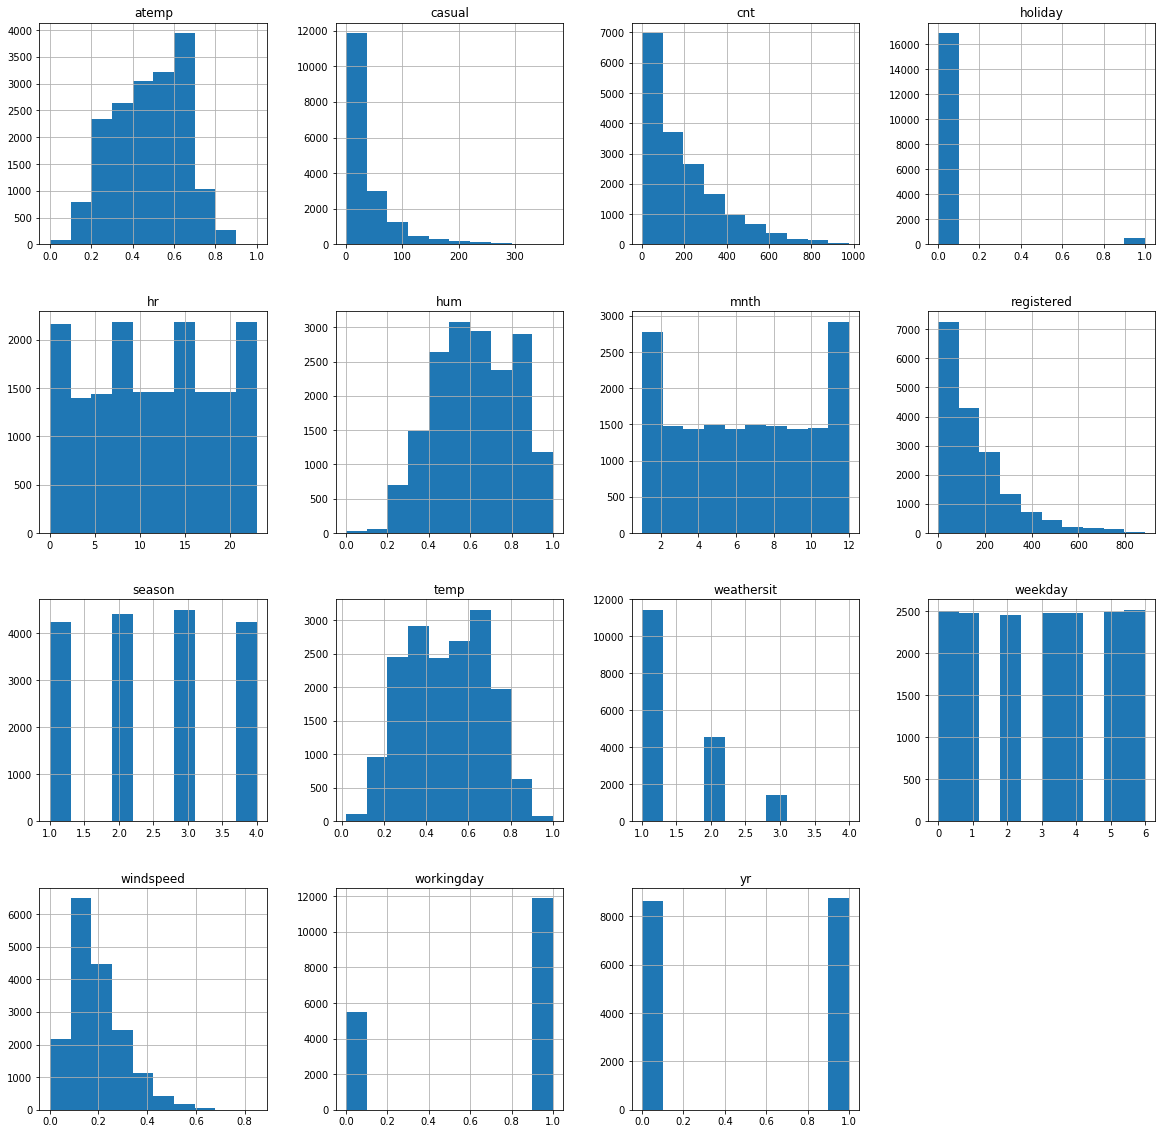

In [90]:
df.hist(figsize=(20,20))

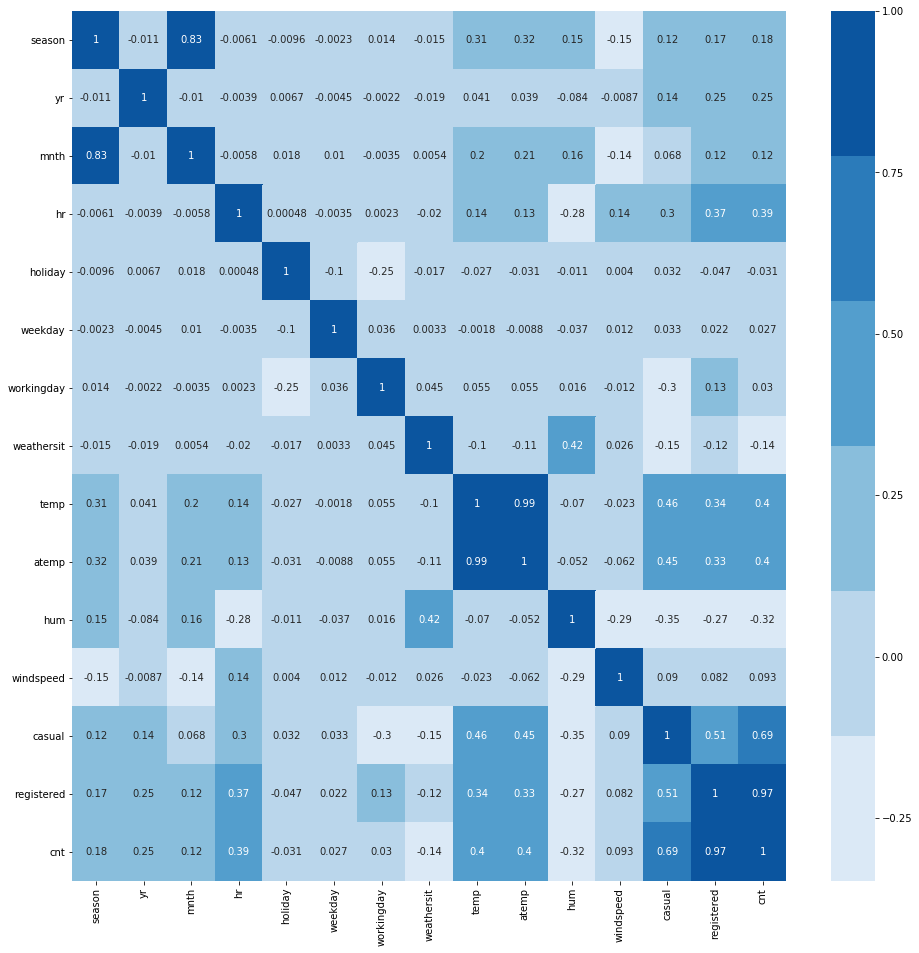

In [91]:
plt.subplots(figsize=(16,16))
sns.heatmap(df.corr(),annot=True,cmap=sns.color_palette('Blues'))

In [0]:

Y=df['cnt'].values.reshape(-1,1)
f=df.drop('cnt',axis=1)
X=f[['registered','temp','atemp','casual']]
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [0]:

lr=LinearRegression()

In [131]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
Y_pred=lr.predict(x_test)

In [133]:
r2_score(y_test,Y_pred)

1.0

In [135]:
a=sm.add_constant(X)
b=sm.OLS(Y,a)
c=b.fit()
print(c.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.297e+33
Date:                Sun, 09 Jun 2019   Prob (F-statistic):               0.00
Time:                        07:01:37   Log-Likelihood:             4.7967e+05
No. Observations:               17379   AIC:                        -9.593e+05
Df Residuals:                   17374   BIC:                        -9.593e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.028e-13      6e-15    -33.784      0.0

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
